In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [123]:
# Read Heart Disease Data
ht = pd.read_csv('Heart_Disease_Data.csv',na_values="?")

In [124]:
ht.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [125]:
# We want to convert all predictive attributes to 1, so our ouput is either 0=no diagnosis, 1=diagnosis
ht['pred_attribute'].replace(to_replace=[1,2,3,4], value=[1,1,1,1],inplace=True)

In [126]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
cp                303 non-null int64
trestbps          303 non-null int64
chol              303 non-null int64
fbs               303 non-null int64
restecg           303 non-null int64
thalach           303 non-null int64
exang             303 non-null int64
oldpeak           303 non-null float64
slop              303 non-null int64
ca                299 non-null float64
thal              301 non-null float64
pred_attribute    303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [127]:
type(ht['oldpeak'])

pandas.core.series.Series

In [128]:
ht['sex'].value_counts()

1    206
0     97
Name: sex, dtype: int64

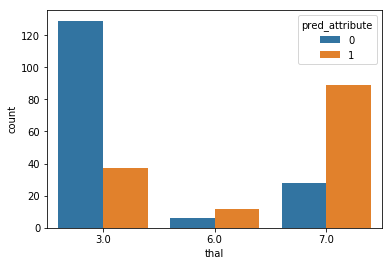

In [129]:
# A countplot to see if the thalamus values are related to a diagnosis. Seems like it is
sns.countplot('thal',data=ht,hue='pred_attribute')

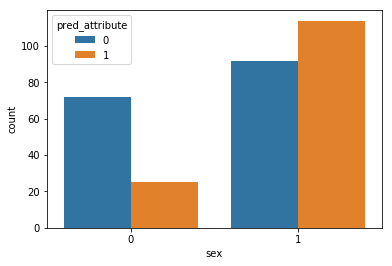

In [130]:
#See if there is any gender differences in diagnosis
sns.countplot('sex',data=ht,hue='pred_attribute')

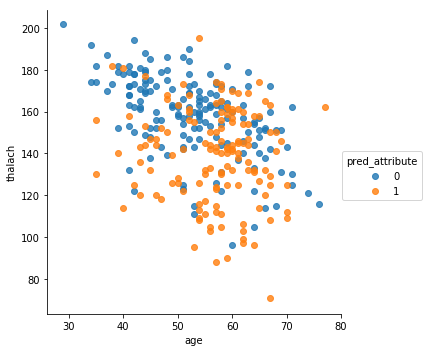

In [132]:
# An lmplot seeing how messy thalamus and age are represented based on diagnosis.
sns.lmplot(x='age', y='thalach', hue='pred_attribute', data=ht, fit_reg=False)


In [134]:
ht.dropna(axis=0,how='any',inplace=True)



In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(ht.drop('pred_attribute',axis=1), ht['pred_attribute'], test_size=0.33, random_state=101) 

In [152]:
#This is logisitc Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred1 = logreg.predict(X_test)

print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))


[[51  4]
 [ 9 35]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89        55
          1       0.90      0.80      0.84        44

avg / total       0.87      0.87      0.87        99



[[38 17]
 [20 24]]
             precision    recall  f1-score   support

          0       0.66      0.69      0.67        55
          1       0.59      0.55      0.56        44

avg / total       0.62      0.63      0.62        99



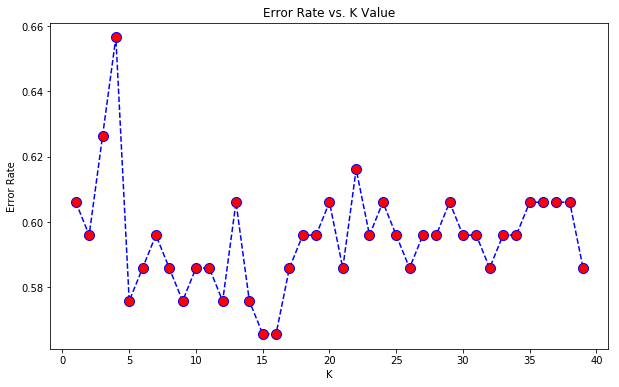

In [140]:
#This is KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(knn.score(X_test,y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')\

In [141]:
#This is svm + grid search AFter

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred3 = svm.predict(X_test)

print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))


[[55  0]
 [44  0]]
             precision    recall  f1-score   support

          0       0.56      1.00      0.71        55
          1       0.00      0.00      0.00        44

avg / total       0.31      0.56      0.40        99



C:\Users\Jeff\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [143]:
from sklearn.grid_search import GridSearchCV

In [145]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.00001]}
grid = GridSearchCV(SVC(),param_grid,verbose=4)

grid.fit(X_train,y_train)
pred4 = grid.predict(X_test)



Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.530303 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.530303 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.530303 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.545455 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.530303 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.545455 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.545455 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.560606 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


NameError: name 'grid_pred4' is not defined

In [147]:
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

[[47  8]
 [13 31]]
             precision    recall  f1-score   support

          0       0.78      0.85      0.82        55
          1       0.79      0.70      0.75        44

avg / total       0.79      0.79      0.79        99



In [148]:
grid.best_params_

{'C': 1000, 'gamma': 1e-05}

In [149]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [154]:
#Decision TREES
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))



             precision    recall  f1-score   support

          0       0.79      0.76      0.78        55
          1       0.72      0.75      0.73        44

avg / total       0.76      0.76      0.76        99



In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)
pred5 = rfc.predict(X_test)
print(classification_report(y_test,pred5))

             precision    recall  f1-score   support

          0       0.81      0.84      0.82        55
          1       0.79      0.75      0.77        44

avg / total       0.80      0.80      0.80        99

